# Working With Noisy Images (Solution)

`NOTE: This should only be attempted after completing the course!`

Below, you have some data that somebody sent you:

In [1]:
data = [
    [1, 0, 4, 0, 5, 0, 3],
    [2, 9, 0, 0, 0, 0, 3],
    [0, 0, 3, 0, 1, 0, 0],
    [4, 0, 0, 6, 0, 2, 0],
    [0, 3, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 4, 0, 0],
    [0, 1, 1, 0, 0, 7, 9],
]

Notice that this is nothing more than just a list of lists, but where we've put each list on its own line for readability. Keep the data as a list for this entire project. 

Plot the data below.

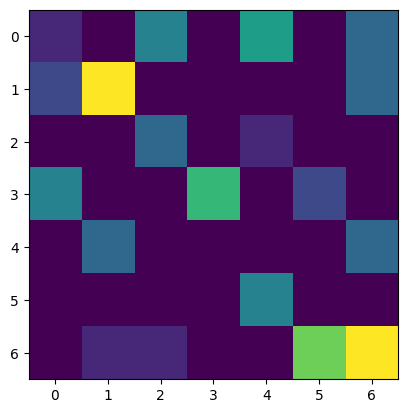

In [2]:
%matplotlib inline
import matplotlib.pyplot as pl

pl.imshow(data)
pl.show()

Let's say we only care about the data points above some threshold value. Write some code to determine the (x, y) coordinates, corresponding to (column, row), where the data is greater than a threshold value of 5. For each coordinate where this condition is met, print out the coordinate on its own line in the form (x, y).

In [3]:
for y, row in enumerate(data):
    for x, value in enumerate(row):
        if value > 5:
            print((x, y))

(1, 1)
(3, 3)
(5, 6)
(6, 6)


Do these coordinates agree with what you can see in the image above?

Let's say we want to "up the contrast" on our image, amplifying the values greater than the threshold and decreasing the relative "noise". Write some code to multiply the values above the threshold by 2, and divide the values below the threshold by 2.

In [4]:
for y, row in enumerate(data):
    for x, value in enumerate(row):
        if value > 5:
            data[y][x] *= 2
        else:
            data[y][x] /= 2

Now plot it.

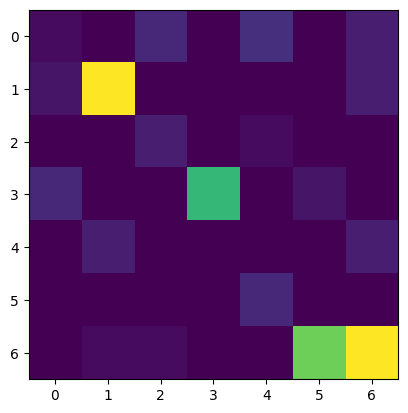

In [5]:
pl.imshow(data)
pl.show()

So, how does it look? Is your dataset adjusted to better bring the real values out of the noise?

Write a function that will take in a 2D image dataset (list of lists) and a `factor` and output a new dataset where all of the values in the input dataset less than `factor` standard deviations above the mean of the dataset are set to zero in the output. 

In other words, if an element in the input dataset is less than `median + factor * standardDeviation`, it should be zero in the output dataset. The `numpy` package has methods for median and standard deviation: https://numpy.org/doc/stable/reference/routines.statistics.html

Have your function also optionally output print statements indicating which coordinates were marked as noise and which weren't, based on a list of coordinates that the user optionally provides for checking. For example, if the user provides coordinates of `[(1, 1), (2, 2), (3, 3)]`, the output could look something like this:

```
The following coordinates were removed:
(2, 2) 

The following coordinates were not removed:
(1, 1), (3, 3)
```

If there were no coordinates removed, then you should not print that part, and only print the following:

```
The following coordinates were not removed:
(1, 1), (2, 2), (3, 3)
```

_Hint: see the `join` method outlined here: https://pythonbasics.org/join/_

Make sure to focus on modularizing your code as much as is necessary to simplify tasks.

In [1]:
import numpy as np

def getIncreasedContrastData(data, factor, coordinatesToCheck=None):
    newData, noiseCoordinates = getCleanedDataAndNoiseCoords(data, factor)
    if coordinatesToCheck is not None:
        evaluateCheckedCoordinates(coordinatesToCheck, noiseCoordinates)
    return newData

def getCleanedDataAndNoiseCoords(data, factor):
    median = np.median(data)
    standardDeviation = np.std(data)

    noiseCoordinates = set()
    newData = [[0 for _ in row] for row in data]
    for y, row in enumerate(data):
        for x, value in enumerate(row):
            if value < median + factor * standardDeviation:
                noiseCoordinates.add((y, x))
            else:
                newData[y][x] = data[y][x]
    
    return newData, noiseCoordinates

def evaluateCheckedCoordinates(coordinatesToCheck, noiseCoordinates):
    coordinatesRemoved = []
    coordinatesNotRemoved = []
    for coordinate in coordinatesToCheck:
        if coordinate in noiseCoordinates:
            coordinatesRemoved.append(coordinate)
        else:
            coordinatesNotRemoved.append(coordinate)
    printCoordinateEvaluationResults(coordinatesRemoved, coordinatesNotRemoved)

def printCoordinateEvaluationResults(coordinatesRemoved, coordinatesNotRemoved):
    if len(coordinatesRemoved):  # Same as if len() > 0
        print("The following coordinates were removed:")
        print(", ".join([str(coord) for coord in coordinatesRemoved]),"\n")
    
    if len(coordinatesNotRemoved):
        print("The following coordinates were not removed:")
        print(", ".join([str(coord) for coord in coordinatesNotRemoved]))

Use the following dataset to test your function for different values of `factor` (and also test that giving a list of coordinates to check works properly):

In [7]:
data2 = [
    [5, 7, 4, 0, 5, 0, 3, 1, 0, 4, 0, 5, 0, 3],
    [7, 9, 6, 0, 0, 0, 3, 4, 0, 0, 6, 0, 2, 0],
    [4, 6, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 7, 9],
    [2, 2, 1, 6, 0, 2, 0, 0, 5, 0, 3, 1, 0, 4],
    [0, 3, 0, 0, 0, 0, 3, 6, 0, 2, 0, 0, 5, 0],
    [0, 0, 0, 0, 4, 0, 0, 4, 6, 4, 0, 3, 1, 0],
    [0, 1, 1, 0, 0, 2, 5, 7, 9, 5, 0, 3, 1, 1],
    [4, 0, 0, 6, 0, 2, 0, 1, 5, 2, 3, 1, 0, 4],
    [1, 0, 4, 0, 5, 0, 3, 1, 0, 4, 0, 5, 0, 3],
    [0, 1, 0, 0, 0, 7, 2, 0, 0, 5, 0, 3, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 7, 9],
    [1, 3, 1, 0, 0, 0, 3, 6, 0, 2, 0, 0, 5, 0],
    [3, 5, 3, 0, 0, 0, 9, 6, 0, 2, 0, 0, 1, 0],
]

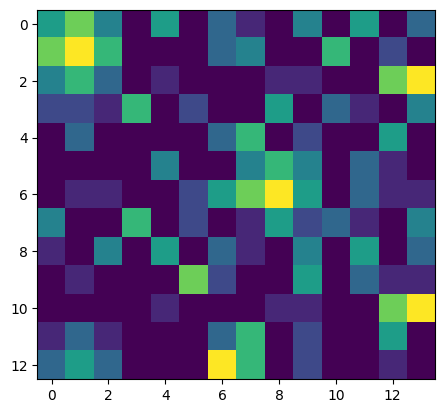

The following coordinates were removed:
(2, 2) 

The following coordinates were not removed:
(1, 1), (3, 3)


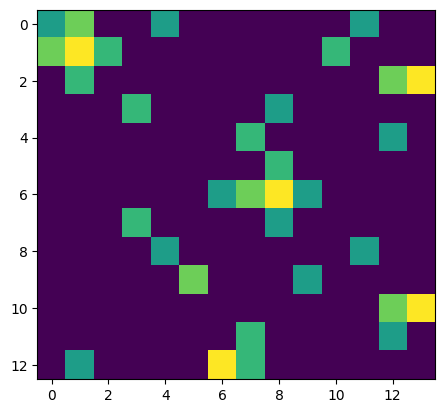

In [10]:
pl.imshow(data2)
pl.show()

testCoordinates = [(1, 1), (2, 2), (3, 3)]
newData = getIncreasedContrastData(data2, 1.6, coordinatesToCheck=testCoordinates)

pl.imshow(newData)
pl.show()